# HW 1: Линейная и логистичекая регрессия

In [2023]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

## Линейная регрессия

In [2024]:
california_housing = fetch_california_housing(as_frame=True)

### 1. Получить данные и загрузить их в выборочную среду

In [2025]:
df = california_housing.frame
print(df)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0      

In [2026]:
data = california_housing.data
print(data.shape)
print(data)

(20640, 8)
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        

In [2027]:
labels = california_housing.target
print(labels.shape)
print(labels)

(20640,)
0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64


### 2. Проверить данные на наличие пропусков и удалить их в случае обнаржуения

In [2028]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Мы видим, что:

1. набор данных содержит 20 640 образцов и 8 признаков

2. все данные имеют тип float64

3. нет пропущенных значений

### 3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое

In [2029]:
X = np.array(data)
y = np.array(labels)

In [2030]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
sc.fit(X_train)
X_train, X_test = sc.transform(X_train), sc.transform(X_test)

In [2031]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве

In [2032]:
from sklearn.metrics import mean_squared_error

In [2033]:
# Вычислить RMSE для для тренировочных данных
y_pred0 = model.predict(X_train)
print(y_pred0)
rmse = mean_squared_error(y_train, y_pred0)
print(rmse)

[1.93725845 2.48910616 2.64735483 ... 2.03879912 2.84075139 2.27373156]
0.5179331255246699


In [2034]:
# Вычислить RMSE для для тестовых данных
y_pred1 = model.predict(X_test)
print(y_pred1)
rmse = mean_squared_error(y_test, y_pred1)
print(rmse)

[0.71912284 1.76401657 2.70965883 ... 4.46877017 1.18751119 2.00940251]
0.5558915986952442


In [2035]:
from sklearn.metrics import r2_score

In [2036]:
# Вычислить коэффициент детерминации для тренировочных данных
r2_score(y_train, y_pred0)

0.6125511913966952

In [2037]:
# Вычислить коэффициент детерминации для тестовых данных
r2_score(y_test, y_pred1)

0.575787706032451

### 5. Постройте график распределения целевой переменной. Сделайте вывод. Присутсвтвуют ли в этом признаке выбросы

<Axes: xlabel='MedHouseVal', ylabel='Count'>

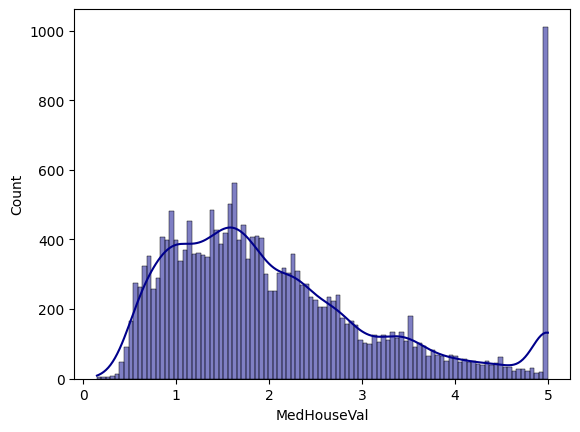

In [2038]:
sns.histplot(labels, kde=True, bins=100, color = 'darkblue')

In [2039]:
Q1 =  df['MedHouseVal'].quantile(q=0.025)
Q3 = df['MedHouseVal'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df[(df['MedHouseVal'] > (Q1-1.5*IQR)) & (df['MedHouseVal'] < (Q3+1.5*IQR))]
df = df_IQR
df_IQR.shape

(20640, 9)

При помощи метода quantile получаем соответствующую нижнюю и верхнюю границы, а затем удаляем всё, что выходит за их рамки. Как видно из гистограммы и того что размер датасета не изменился у нас нет выбросов

### 6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки поделены на цветные категории, в ячейках указзано числовое значение корреляции

Подсказка: испольуйте пакет sns и его метод heatmap

Text(0.5, 1.0, 'df')

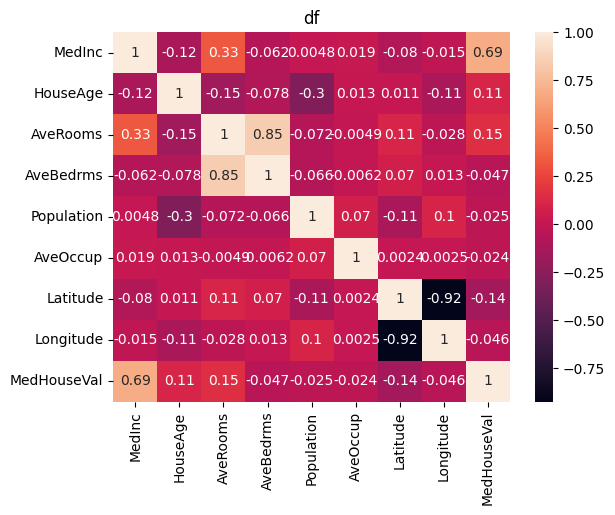

In [2040]:
corr_matrix = df.corr()
fig, heat = plt.subplots()
fig = sns.heatmap(corr_matrix, annot=True)
heat.set_title('df')

#### Cделайте выводы

Есть корреляция между AveRooms и AveBedrms равная 0.33, AveRooms и MedInc равная 0.85

Уберем из признаков AveRooms

Text(0.5, 1.0, 'df1')

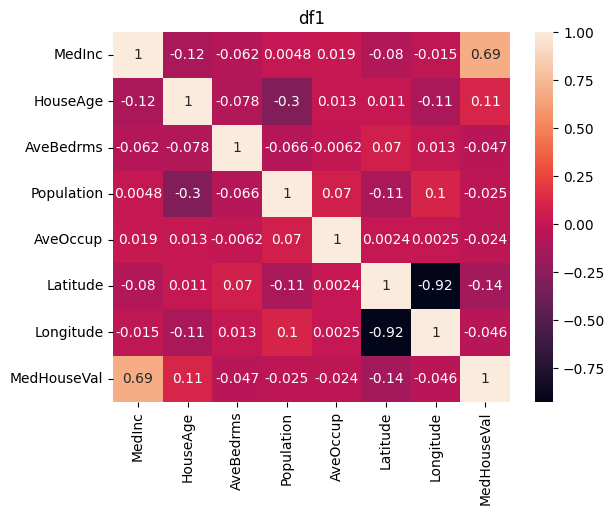

In [2041]:
df1 = df.drop('AveRooms', axis=1)

corr_matrix = df1.corr()
fig, heat = plt.subplots()
fig = sns.heatmap(corr_matrix, annot=True)
heat.set_title('df1')

### 7. Исследуйте оставленные признаки на выбросы

In [2042]:
print(df1)

       MedInc  HouseAge  AveBedrms  Population  AveOccup  Latitude  Longitude  \
0      8.3252      41.0   1.023810       322.0  2.555556     37.88    -122.23   
1      8.3014      21.0   0.971880      2401.0  2.109842     37.86    -122.22   
2      7.2574      52.0   1.073446       496.0  2.802260     37.85    -122.24   
3      5.6431      52.0   1.073059       558.0  2.547945     37.85    -122.25   
4      3.8462      52.0   1.081081       565.0  2.181467     37.85    -122.25   
...       ...       ...        ...         ...       ...       ...        ...   
20635  1.5603      25.0   1.133333       845.0  2.560606     39.48    -121.09   
20636  2.5568      18.0   1.315789       356.0  3.122807     39.49    -121.21   
20637  1.7000      17.0   1.120092      1007.0  2.325635     39.43    -121.22   
20638  1.8672      18.0   1.171920       741.0  2.123209     39.43    -121.32   
20639  2.3886      16.0   1.162264      1387.0  2.616981     39.37    -121.24   

       MedHouseVal  
0     

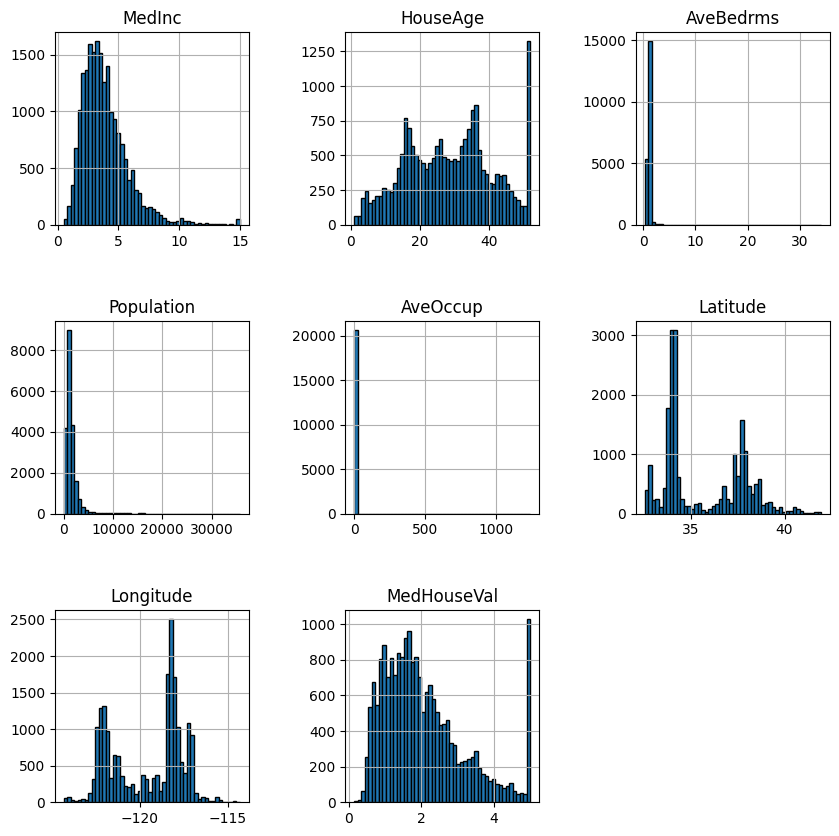

In [2043]:
df1.hist(figsize=(10, 10), bins=50, edgecolor="black")
plt.subplots_adjust(hspace=0.5, wspace=0.5)

In [2044]:
Q1 =  df1['MedInc'].quantile(q=0.025)
Q3 = df1['MedInc'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df1[(df1['MedInc'] > (Q1-1.5*IQR)) & (df1['MedInc'] < (Q3+1.5*IQR))]
df1 = df_IQR
df_IQR.shape

(20640, 8)

In [2045]:
Q1 =  df1['HouseAge'].quantile(q=0.025)
Q3 = df1['HouseAge'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df1[(df1['HouseAge'] > (Q1-1.5*IQR)) & (df1['HouseAge'] < (Q3+1.5*IQR))]
df1 = df_IQR
df_IQR.shape

(20640, 8)

In [2046]:
Q1 =  df1['AveBedrms'].quantile(q=0.025)
Q3 = df1['AveBedrms'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df1[(df1['AveBedrms'] > (Q1-1.5*IQR)) & (df1['AveBedrms'] < (Q3+1.5*IQR))]
df1 = df_IQR
df_IQR.shape

(20478, 8)

In [2047]:
Q1 =  df1['Population'].quantile(q=0.025)
Q3 = df1['Population'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df1[(df1['Population'] > (Q1-1.5*IQR)) & (df1['Population'] < (Q3+1.5*IQR))]
df1 = df_IQR
df_IQR.shape

(20455, 8)

In [2048]:
Q1 =  df1['AveOccup'].quantile(q=0.025)
Q3 = df1['AveOccup'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df1[(df1['AveOccup'] > (Q1-1.5*IQR)) & (df1['AveOccup'] < (Q3+1.5*IQR))]
df1 = df_IQR
df_IQR.shape

(20412, 8)

In [2049]:
Q1 =  df1['Latitude'].quantile(q=0.025)
Q3 = df1['Latitude'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df1[(df1['Latitude'] > (Q1-1.5*IQR)) & (df1['Latitude'] < (Q3+1.5*IQR))]
df1 = df_IQR
df_IQR.shape

(20412, 8)

In [2050]:
Q1 =  df1['Longitude'].quantile(q=0.025)
Q3 = df1['Longitude'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df1[(df1['Longitude'] > (Q1-1.5*IQR)) & (df1['Longitude'] < (Q3+1.5*IQR))]
df1 = df_IQR
df_IQR.shape

(20412, 8)

У нас были выбросы в AveBedrms, Population и AveOccup. При помощи метода quantile получаем соответствующую нижнюю и верхнюю границы, а затем удаляем всё, что выходит за их рамки

In [2051]:
data1 = df1.drop('MedHouseVal', axis = 1)
labels = df1['MedHouseVal']
X = np.array(data1)
y = np.array(labels)

In [2052]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
sc.fit(X_train)
X_train, X_test = sc.transform(X_train), sc.transform(X_test)

In [2053]:
one_more_model = LinearRegression()
one_more_model.fit(X_train, y_train)

LinearRegression()

In [2054]:
# Вычислить RMSE для для тренировочных данных
y_pred0 = one_more_model.predict(X_train)
print(y_pred0)
rmse = mean_squared_error(y_train, y_pred0)
print(rmse)

[1.62120381 3.12377056 1.28662185 ... 2.11326039 3.16173417 2.63400862]
0.4534257188367225


In [2055]:
# Вычислить коэффициент детерминации для тренировочных данных
r2_score(y_train, y_pred0)

0.6571721756875656

In [2056]:
# Вычислить RMSE для для тестовых данных
y_pred1 = one_more_model.predict(X_test)
print(y_pred1)
rmse = mean_squared_error(y_test, y_pred1)
print(rmse)

[1.43219534 1.91932858 1.31310767 ... 1.17937094 2.32483317 0.42775606]
0.46802212188106174


In [2057]:
# Вычислить коэффициент детерминации для тестовых данных
r2_score(y_test, y_pred1)

0.6595248127425455

### 8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.

In [2058]:
X_modified = X

for j in range(X.shape[1]):
  for i in range(X.shape[0]):
    if j == 1: # HouseAge
      X_modified[i][j] = np.sqrt(X[i][j])
    if j == 2: # AveBedrms
      X_modified[i][j] = np.sqrt(X[i][j])
    if j == 4: # AveOccup
      X_modified[i][j] = np.sqrt(X[i][j])

In [2059]:
X_train, X_test, y_train, y_test = train_test_split(X_modified, y, test_size=0.2, random_state=42)
sc = StandardScaler()
sc.fit(X_train)
X_train, X_test = sc.transform(X_train), sc.transform(X_test)

In [2060]:
math_transform_model = LinearRegression()
math_transform_model.fit(X_train, y_train)

LinearRegression()

In [2061]:
# Вычислить RMSE для для тренировочных данных
y_pred0 = math_transform_model.predict(X_train)
print(y_pred0)
rmse = mean_squared_error(y_train, y_pred0)
print(rmse)

[1.63211266 3.1236509  1.32054597 ... 2.09790595 3.18115175 2.63038595]
0.44576912818968656


In [2062]:
# Вычислить коэффициент детерминации для тренировочных данных
r2_score(y_train, y_pred0)

0.6629611995654093

In [2063]:
# Вычислить RMSE для для тестовых данных
y_pred1 = math_transform_model.predict(X_test)
print(y_pred1)
rmse = mean_squared_error(y_test, y_pred1)
print(rmse)

[1.44879919 1.98155212 1.24937066 ... 1.20924535 2.33528134 0.41586504]
0.45831505376507314


In [2064]:
# Вычислить коэффициент детерминации для тестовых данных
r2_score(y_test, y_pred1)

0.6665864785912208

### 9. Cформулируйте выводы по проделанной работе

После удаления признака AveRooms и выбросов в данных r2 сильно вырос.

При взятии корня от HouseAge, AveBedrms и AveOccup r2 немного вырос.

(Брал разные функции от разных переменных, но они не давали прироста r2)

### 10. (EXTRA) : Своя реализация линейной регрессии

Сделайте свою реализацию линейной регрессии используя исключительно numpy и стандартным python на датасете, определённом выше

Используйте метод наименьших квадратов: [МНК простейшие частные случаи](https://ru.wikipedia.org/wiki/Метод_наименьших_квадратов#Простейшие_частные_случаи)

In [2065]:
import numpy as np
np.random.seed(42)

class LinearRegression:
    def __init__(self, **kwargs):
      self.coef_ = None

    def fit(self, x: np.array, y: np.array):
      if len(x.shape) == 2:
        n = x.shape[0]
        m = x.shape[1]
      else:
        n = x.shape[0]
        m = 1
      e = [1]*n
      if len(x.shape) == 2:
        x = np.insert(x, m, e, axis=1)
      else:
        x = np.column_stack((x,e))
      xt = np.transpose(x)
      xu0 = np.dot(xt,x)
      xo = np.linalg.inv(xu0)
      xu1 = np.dot(xo,xt)
      self.coef_ = np.dot(xu1,y)

    def predict(self, x: np.array):
      if len(x.shape) == 2:
        n = x.shape[0]
        m = x.shape[1]
      else:
        n = x.shape[0]
        m = 1
      e = [1]*n
      if len(x.shape) == 2:
        x = np.insert(x, m, e, axis=1)
      else:
        x = np.column_stack((x,e))
      return np.dot(x,self.coef_)

X_train, x_test, y_train, y_test = train_test_split(X_modified, y, test_size=0.2, shuffle=True, random_state=42)

sc = StandardScaler()
sc.fit(X_train)
X_train, x_test = sc.transform(X_train), sc.transform(x_test)

LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

predictions = LinReg.predict(x_test)

print(' mean squared error: ', mean_squared_error(y_test, predictions))
print('R2 score: ', r2_score(y_test, predictions))

 mean squared error:  0.45831505376507325
R2 score:  0.6665864785912208


Estimated coefficients:
b_0 = [2.93655106] nb_1 = [2.55808002]
 mean squared error:  0.07623324582875007
R2 score:  0.9038655568672764


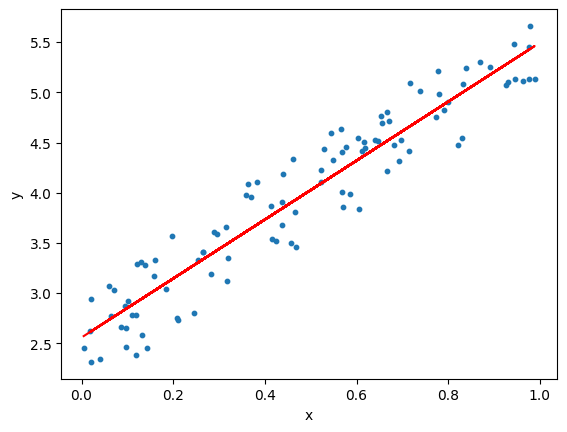

In [2066]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)

n = len(x)

LinReg = LinearRegression()
LinReg.fit(x, y)

y_predicted = LinReg.predict(x)

coefs = LinReg.coef_
a = coefs[0]
b = coefs[1]

y_predicted = a*x+b

print("Estimated coefficients:\nb_0 = {} nb_1 = {}".format(coefs[0], coefs[1]))
print(' mean squared error: ', mean_squared_error(y, y_predicted))
print('R2 score: ', r2_score(y, y_predicted))

plt.scatter(x, y, s=10)
plt.plot(x, y_predicted, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Формат результата:**


Estimated coefficients:
b_0 = [2.93655106] nb_1 = [2.55808002]
 mean squared error:  0.07623324582875007
R2 score:  0.9038655568672764

## Логистическая регресия и классификация

### 11. Классификация на данных датасета adult.csv

- Загружаем данные

In [2067]:
df = pd.read_csv('adult.csv')
print(df)

       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishin

- Первичный анализ

In [2068]:
print(df['age'].dtype)
print(df['age'].min(), df['age'].max())
df['age'] = df['age'].astype('int8')
print(df['age'].dtype)

int64
17 90
int8


In [2069]:
print(df['fnlwgt'].dtype)
print(df['fnlwgt'].min(), df['fnlwgt'].max())
df['fnlwgt'] = df['fnlwgt'].astype('int32')
print(df['fnlwgt'].dtype)

int64
12285 1490400
int32


In [2070]:
print(df['educational-num'].dtype)
print(df['educational-num'].min(), df['educational-num'].max())
df['educational-num'] = df['educational-num'].astype('int8')
print(df['educational-num'].dtype)

int64
1 16
int8


In [2071]:
print(df['capital-gain'].dtype)
print(df['capital-gain'].min(), df['capital-gain'].max())
df['capital-gain'] = df['capital-gain'].astype('int32')
print(df['capital-gain'].dtype)

int64
0 99999
int32


In [2072]:
print(df['capital-loss'].dtype)
print(df['capital-loss'].min(), df['capital-loss'].max())
df['capital-loss'] = df['capital-loss'].astype('int16')
print(df['capital-loss'].dtype)

int64
0 4356
int16


In [2073]:
print(df['hours-per-week'].dtype)
print(df['hours-per-week'].min(), df['hours-per-week'].max())
df['hours-per-week'] = df['hours-per-week'].astype('int8')
print(df['hours-per-week'].dtype)

int64
1 99
int8


- Проверка наличия пропусков

In [2074]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int8  
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int32 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int8  
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int32 
 11  capital-loss     48842 non-null  int16 
 12  hours-per-week   48842 non-null  int8  
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int16(1), int32(2), int8(3), object(9)
memory usage: 4.0+ MB


Мы видим, что нет пропущенных значений

- Построение графиков

<Axes: xlabel='age', ylabel='Count'>

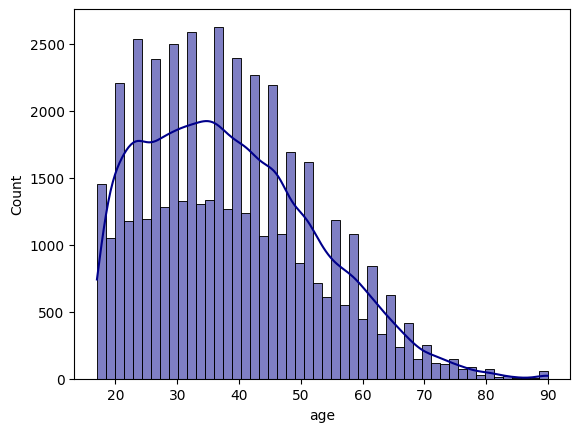

In [2075]:
sns.histplot(df['age'], kde=True, bins=50, color = 'darkblue')

In [2076]:
Q1 =  df['age'].quantile(q=0.025)
Q3 = df['age'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df[(df['age'] > (Q1-1.5*IQR)) & (df['age'] < (Q3+1.5*IQR))]
df = df_IQR
df_IQR.shape

(48842, 15)

<Axes: xlabel='fnlwgt', ylabel='Count'>

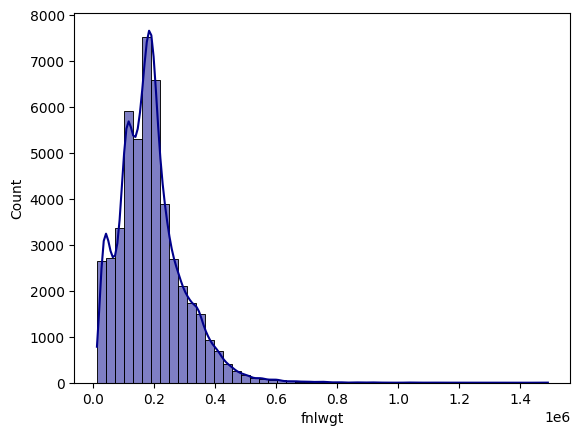

In [2077]:
sns.histplot(df['fnlwgt'], kde=True, bins=50, color = 'darkblue')

In [2078]:
Q1 =  df['fnlwgt'].quantile(q=0.025)
Q3 = df['fnlwgt'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df[(df['fnlwgt'] > (Q1-1.5*IQR)) & (df['fnlwgt'] < (Q3+1.5*IQR))]
df = df_IQR
df_IQR.shape

(48825, 15)

<Axes: xlabel='educational-num', ylabel='Count'>

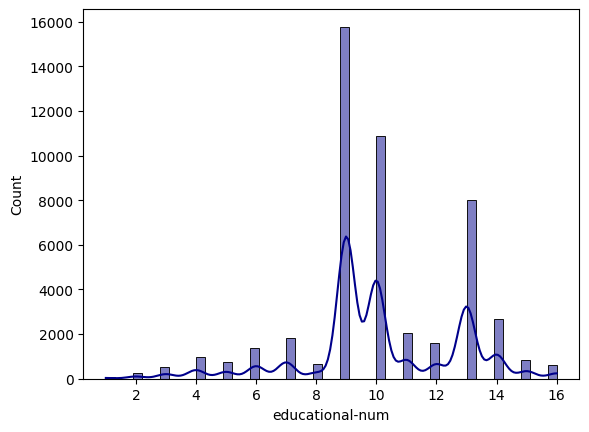

In [2079]:
sns.histplot(df['educational-num'], kde=True, bins=50, color = 'darkblue')

In [2080]:
Q1 =  df['educational-num'].quantile(q=0.025)
Q3 = df['educational-num'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df[(df['educational-num'] > (Q1-1.5*IQR)) & (df['educational-num'] < (Q3+1.5*IQR))]
df = df_IQR
df_IQR.shape

(48825, 15)

<Axes: xlabel='capital-gain', ylabel='Count'>

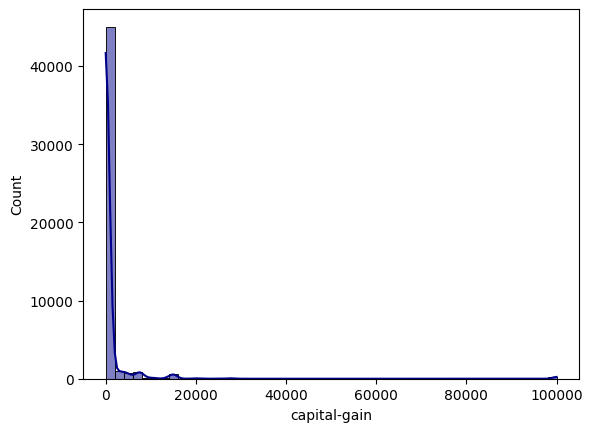

In [2081]:
sns.histplot(df['capital-gain'], kde=True, bins=50, color = 'darkblue')

In [2082]:
Q1 =  df['capital-gain'].quantile(q=0.025)
Q3 = df['capital-gain'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df[(df['capital-gain'] > (Q1-1.5*IQR)) & (df['capital-gain'] < (Q3+1.5*IQR))]
df = df_IQR
df_IQR.shape

(48493, 15)

<Axes: xlabel='capital-loss', ylabel='Count'>

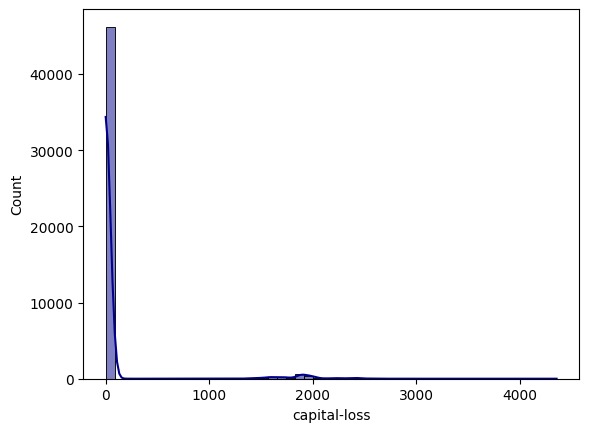

In [2083]:
sns.histplot(df['capital-loss'], kde=True, bins=50, color = 'darkblue')

In [2084]:
Q1 =  df['capital-loss'].quantile(q=0.025)
Q3 = df['capital-loss'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df[(df['capital-loss'] > (Q1-1.5*IQR)) & (df['capital-loss'] < (Q3+1.5*IQR))]
df = df_IQR
df_IQR.shape

(48493, 15)

<Axes: xlabel='hours-per-week', ylabel='Count'>

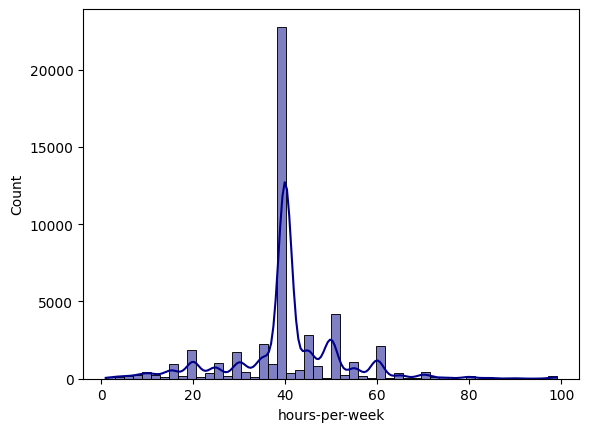

In [2085]:
sns.histplot(df['hours-per-week'], kde=True, bins=50, color = 'darkblue')

In [2086]:
Q1 =  df['hours-per-week'].quantile(q=0.025)
Q3 = df['hours-per-week'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df[(df['hours-per-week'] > (Q1-1.5*IQR)) & (df['hours-per-week'] < (Q3+1.5*IQR))]
df = df_IQR
df_IQR.shape

(48493, 15)

- Выберем категориальные признаки

In [2087]:
name = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
categorial_data = pd.DataFrame()
for i in name:
  categorial_data[i] = df[i]
# признаки name являются категориальными
# переведем значения этих столбцов в числа
le = LabelEncoder()
X = pd.DataFrame()
for i in name:
  le.fit(categorial_data[i])
  X[i] = le.transform(categorial_data[i])
df0 = df
for i in name:
  df0[i] = X[i]

<Axes: xlabel='workclass', ylabel='Count'>

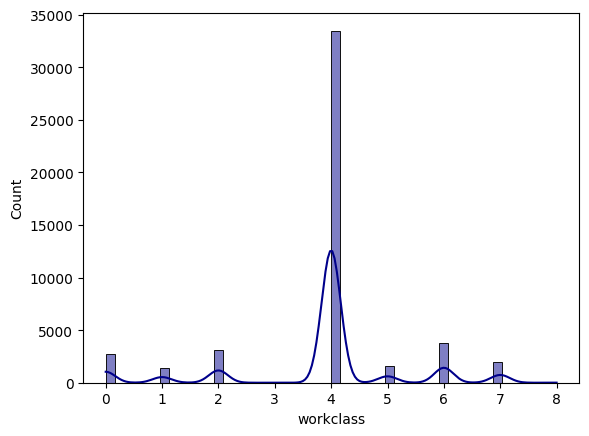

In [2088]:
sns.histplot(df0['workclass'], kde=True, bins=50, color = 'darkblue')

In [2089]:
Q1 =  df0['workclass'].quantile(q=0.025)
Q3 = df0['workclass'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df0[(df0['workclass'] > (Q1-1.5*IQR)) & (df0['workclass'] < (Q3+1.5*IQR))]
df0 = df_IQR
df_IQR.shape

(48147, 15)

<Axes: xlabel='education', ylabel='Count'>

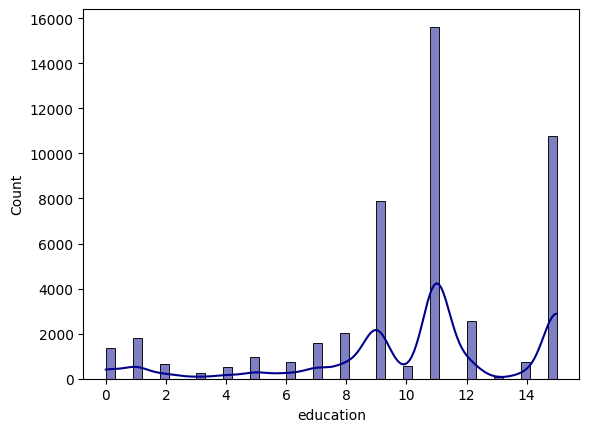

In [2090]:
sns.histplot(df0['education'], kde=True, bins=50, color = 'darkblue')

In [2091]:
Q1 =  df0['education'].quantile(q=0.025)
Q3 = df0['education'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df0[(df0['education'] > (Q1-1.5*IQR)) & (df0['education'] < (Q3+1.5*IQR))]
df0 = df_IQR
df_IQR.shape

(48147, 15)

<Axes: xlabel='marital-status', ylabel='Count'>

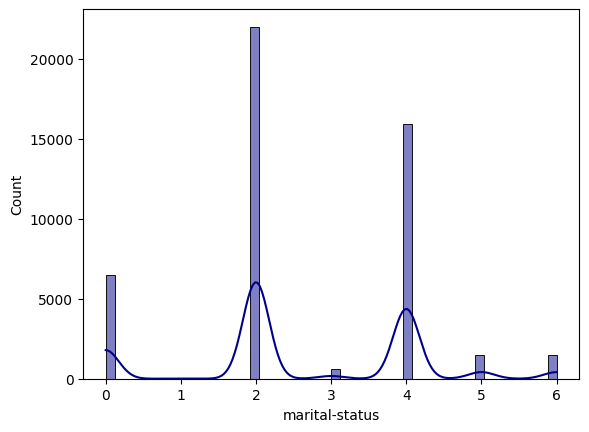

In [2092]:
sns.histplot(df0['marital-status'], kde=True, bins=50, color = 'darkblue')

In [2093]:
Q1 =  df0['marital-status'].quantile(q=0.025)
Q3 = df0['marital-status'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df0[(df0['marital-status'] > (Q1-1.5*IQR)) & (df0['marital-status'] < (Q3+1.5*IQR))]
df0 = df_IQR
df_IQR.shape

(48147, 15)

<Axes: xlabel='occupation', ylabel='Count'>

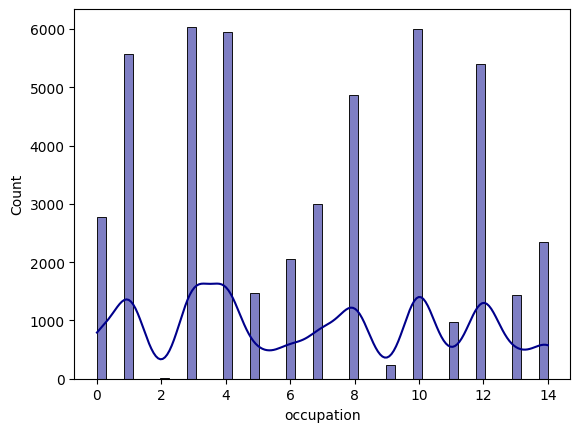

In [2094]:
sns.histplot(df0['occupation'], kde=True, bins=50, color = 'darkblue')

In [2095]:
Q1 =  df0['occupation'].quantile(q=0.025)
Q3 = df0['occupation'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df0[(df0['occupation'] > (Q1-1.5*IQR)) & (df0['occupation'] < (Q3+1.5*IQR))]
df0 = df_IQR
df_IQR.shape

(48147, 15)

<Axes: xlabel='relationship', ylabel='Count'>

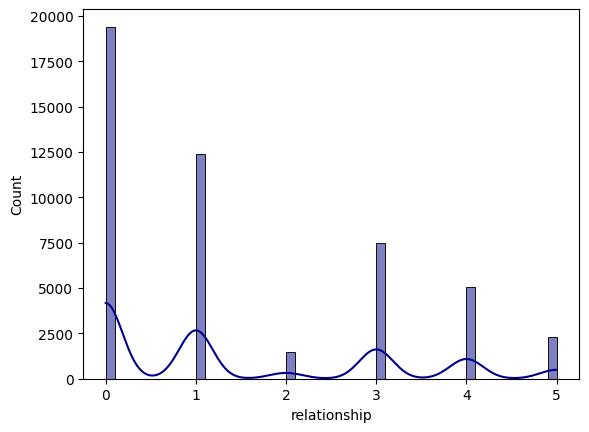

In [2096]:
sns.histplot(df0['relationship'], kde=True, bins=50, color = 'darkblue')

In [2097]:
Q1 =  df0['relationship'].quantile(q=0.025)
Q3 = df0['relationship'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df0[(df0['relationship'] > (Q1-1.5*IQR)) & (df0['relationship'] < (Q3+1.5*IQR))]
df0 = df_IQR
df_IQR.shape

(48147, 15)

<Axes: xlabel='race', ylabel='Count'>

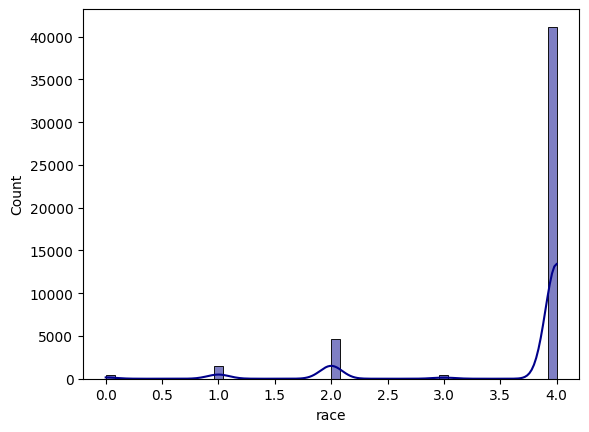

In [2098]:
sns.histplot(df0['race'], kde=True, bins=50, color = 'darkblue')

In [2099]:
Q1 =  df0['race'].quantile(q=0.025)
Q3 = df0['race'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df0[(df0['race'] > (Q1-1.5*IQR)) & (df0['race'] < (Q3+1.5*IQR))]
df0 = df_IQR
df_IQR.shape

(48147, 15)

<Axes: xlabel='gender', ylabel='Count'>

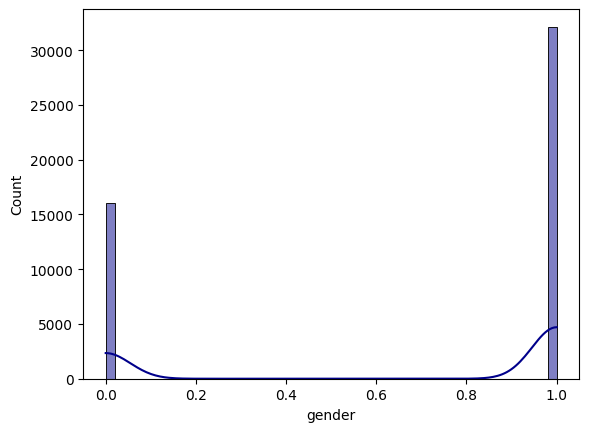

In [2100]:
sns.histplot(df0['gender'], kde=True, bins=50, color = 'darkblue')

In [2101]:
Q1 =  df0['gender'].quantile(q=0.025)
Q3 = df0['gender'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df0[(df0['gender'] > (Q1-1.5*IQR)) & (df0['gender'] < (Q3+1.5*IQR))]
df0 = df_IQR
df_IQR.shape

(48147, 15)

<Axes: xlabel='native-country', ylabel='Count'>

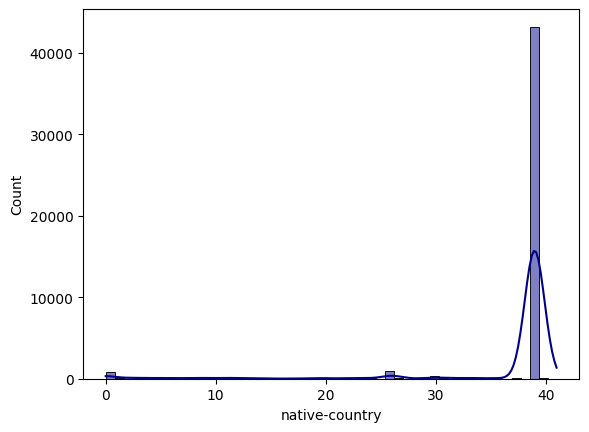

In [2102]:
sns.histplot(df0['native-country'], kde=True, bins=50, color = 'darkblue')

In [2103]:
Q1 =  df0['native-country'].quantile(q=0.025)
Q3 = df0['native-country'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df0[(df0['native-country'] > (Q1-1.5*IQR)) & (df0['native-country'] < (Q3+1.5*IQR))]
df0 = df_IQR
df_IQR.shape

(48147, 15)

- Разделить выборку на обучающее и тестовое подмножетсва.

In [2104]:
# целевая переменная (столбец income) снова является категориальной
# переведем значения столбца в числа
le = LabelEncoder()

In [2105]:
le.fit(df0['income'])

LabelEncoder()

In [2106]:
y = le.transform(df0['income'])
df0['income'] = y

<Axes: xlabel='income', ylabel='Count'>

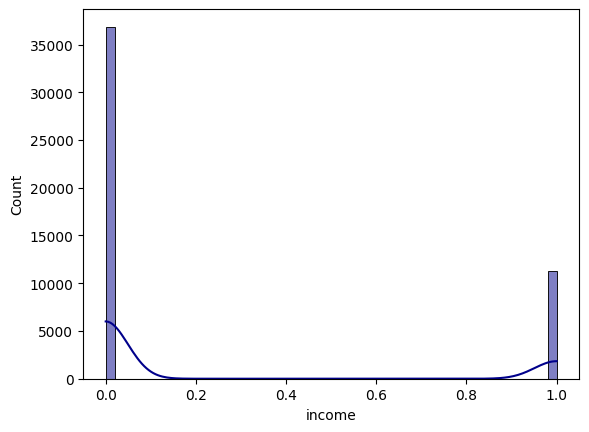

In [2107]:
sns.histplot(df0['income'], kde=True, bins=50, color = 'darkblue')

In [2108]:
Q1 =  df0['income'].quantile(q=0.025)
Q3 = df0['income'].quantile(q=0.975)
IQR = Q3 - Q1
df_IQR = df0[(df0['income'] > (Q1-1.5*IQR)) & (df0['income'] < (Q3+1.5*IQR))]
df0 = df_IQR
df_IQR.shape

(48147, 15)

In [2109]:
print(df0['workclass'].dtype)
print(df0['workclass'].min(), df0['workclass'].max())
df0['workclass'] = df0['workclass'].astype('int8')
print(df0['workclass'].dtype)

float64
0.0 8.0
int8


In [2110]:
print(df0['education'].dtype)
print(df0['education'].min(), df0['education'].max())
df0['education'] = df0['education'].astype('int8')
print(df0['education'].dtype)

float64
0.0 15.0
int8


In [2111]:
print(df0['marital-status'].dtype)
print(df0['marital-status'].min(), df0['marital-status'].max())
df0['marital-status'] = df0['marital-status'].astype('int8')
print(df0['marital-status'].dtype)

float64
0.0 6.0
int8


In [2112]:
print(df0['occupation'].dtype)
print(df0['occupation'].min(), df0['occupation'].max())
df0['occupation'] = df0['occupation'].astype('int8')
print(df0['occupation'].dtype)

float64
0.0 14.0
int8


In [2113]:
print(df0['relationship'].dtype)
print(df0['relationship'].min(), df0['relationship'].max())
df0['relationship'] = df0['relationship'].astype('int8')
print(df0['relationship'].dtype)

float64
0.0 5.0
int8


In [2114]:
print(df0['race'].dtype)
print(df0['race'].min(), df0['race'].max())
df0['race'] = df0['race'].astype('int8')
print(df0['race'].dtype)

float64
0.0 4.0
int8


In [2115]:
print(df0['gender'].dtype)
print(df0['gender'].min(), df0['gender'].max())
df0['gender'] = df0['gender'].astype('int8')
print(df0['gender'].dtype)

float64
0.0 1.0
int8


In [2116]:
print(df0['native-country'].dtype)
print(df0['native-country'].min(), df0['native-country'].max())
df0['native-country'] = df0['native-country'].astype('int8')
print(df0['native-country'].dtype)

float64
0.0 41.0
int8


In [2117]:
print(df0['income'].dtype)
print(df0['income'].min(), df0['income'].max())
df0['income'] = df0['income'].astype('int8')
print(df0['income'].dtype)

int64
0 1
int8


In [2118]:
print(df0.info())
y = df0['income']
df0 = df0.drop(columns = 'income', axis = 1)
X = np.array(df0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48147 entries, 0 to 48492
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              48147 non-null  int8 
 1   workclass        48147 non-null  int8 
 2   fnlwgt           48147 non-null  int32
 3   education        48147 non-null  int8 
 4   educational-num  48147 non-null  int8 
 5   marital-status   48147 non-null  int8 
 6   occupation       48147 non-null  int8 
 7   relationship     48147 non-null  int8 
 8   race             48147 non-null  int8 
 9   gender           48147 non-null  int8 
 10  capital-gain     48147 non-null  int32
 11  capital-loss     48147 non-null  int16
 12  hours-per-week   48147 non-null  int8 
 13  native-country   48147 non-null  int8 
 14  income           48147 non-null  int8 
dtypes: int16(1), int32(2), int8(12)
memory usage: 1.4 MB
None


- Разделим данные на обучающие и тестовы

In [2119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
sc.fit(X_train)
X_train, X_test = sc.transform(X_train), sc.transform(X_test)

- Логистические регрессии

In [2120]:
log_model = LogisticRegression()

- 80% данных оставить на обучающее множество, 20% на тестовое. Обучите модель и сделайте предикт:

In [2121]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [2122]:
predictions = log_model.predict(X_test)
print(predictions)

[1 0 0 ... 0 0 0]


In [2123]:
from sklearn.metrics import f1_score
# Вычислим F1 score для тестовых данных
f1 = f1_score(y_test, predictions)
print('F1 score:', f1)
from sklearn.metrics import roc_auc_score
# Вычислим ROC AUC для тестовых данных
roc_auc = roc_auc_score(y_test, predictions)
print('ROC AUC:', roc_auc)

F1 score: 0.4938846825859056
ROC AUC: 0.6658757007539146


### 12. Выводы:

Преобразовал категориальные данные и типы данных, чтобы освободить память, построил графики и удалил все выбросы.

На основании F1 score и ROC AUC можно сделать вывод что модель получилась неплохой